In [2]:
import pandas as pd
import numpy as np

from apriori import *

In [27]:
benes = pd.read_csv("data/Q1.csv", index_col=0, header=None)
benes

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
00013D2EFD8E45D1,0,1,0,0,0,0,0,0,1,0,0
00016F745862898F,1,1,1,0,0,0,1,0,0,0,0
00052705243EA128,0,0,1,1,0,0,1,1,0,0,0
0007F12A492FD25D,0,1,1,0,1,1,1,1,0,0,0
000B97BA2314E971,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
FABB31F818D27D31,0,1,1,0,1,1,1,1,1,1,0
FAE53771C454A604,1,1,0,0,1,1,1,1,1,0,0
FC52CEBDED1077B1,1,1,1,1,0,1,1,1,1,0,1


<Axes: >

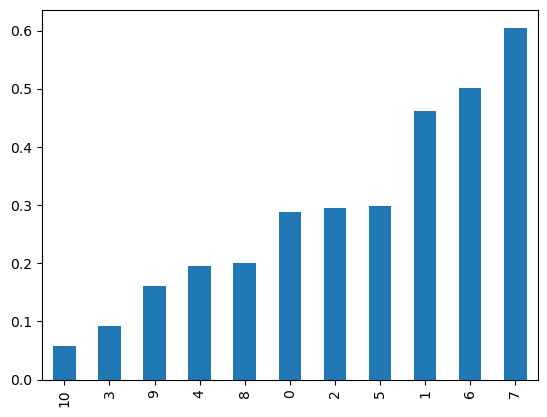

In [28]:
benes.sum(axis=0).reset_index(drop=True).sort_values().divide(len(benes.index)).plot.bar()

In [30]:
benes.sample(frac = 0.1).to_csv("data/Q1_sample.csv", header = False)

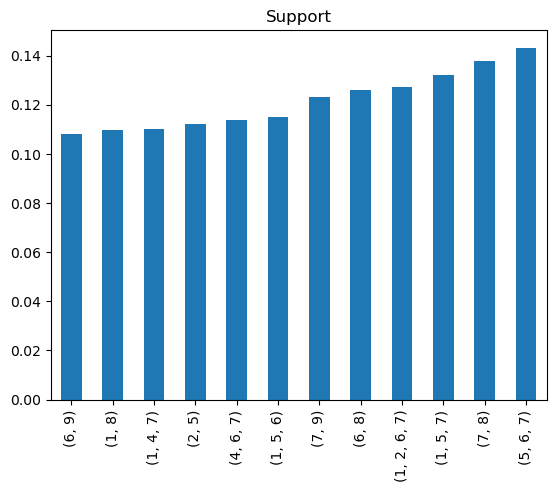

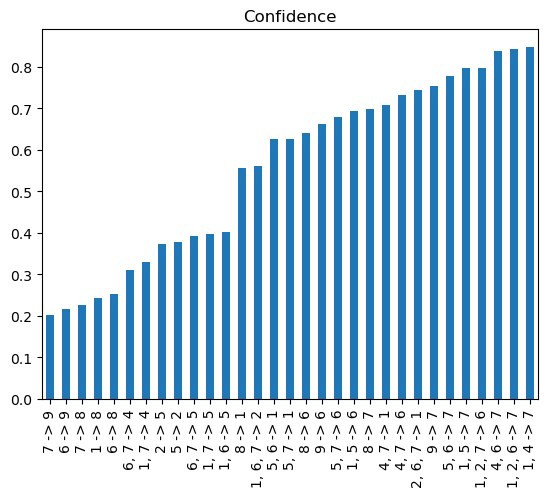

In [31]:
apriori_explore("data/Q1_sample.csv", 0.1, sparse=False)

In [32]:
ccs = pd.Series(["SP_ALZHDMTA", "SP_CHF", "SP_CHRNKIDN", "SP_CNCR", "SP_COPD", "SP_DEPRESSN", "SP_DIABETES", "SP_ISCHMCHT", "SP_OSTEOPRS", "SP_RA_OA", "SP_STRKETIA"]).to_frame().reset_index()
ccs.columns = ["Id", "CC"]
ccs.to_csv("data/Q1_header.csv", index=False)
ccs

,Id,CC
0,0,SP_ALZHDMTA
1,1,SP_CHF
2,2,SP_CHRNKIDN
3,3,SP_CNCR
4,4,SP_COPD
5,5,SP_DEPRESSN
6,6,SP_DIABETES
7,7,SP_ISCHMCHT
8,8,SP_OSTEOPRS
9,9,SP_RA_OA


In [37]:
apriori_full("data/Q1_sample.csv", minSup=0.1, minConf=0.75, sparse=False)

minSup: 0.100000, minConf: 0.750000

Skyline Frequent Itemsets:
[(1, 8), (2, 5), (6, 8), (6, 9), (7, 8), (7, 9), (1, 4, 7), (1, 5, 6), (1, 5, 7), (4, 6, 7), (5, 6, 7), (1, 2, 6, 7)]

Singleton Association Rules:
Rule 1: 9 ---> 7 [sup = 0.12308, conf = 0.75365]
Rule 2: 1, 4 ---> 7 [sup = 0.11011, conf = 0.84725]
Rule 3: 1, 5 ---> 7 [sup = 0.13208, conf = 0.79585]
Rule 4: 4, 6 ---> 7 [sup = 0.11382, conf = 0.83821]
Rule 5: 5, 6 ---> 7 [sup = 0.14320, conf = 0.77842]
Rule 6: 1, 2, 7 ---> 6 [sup = 0.12705, conf = 0.79734]
Rule 7: 1, 2, 6 ---> 7 [sup = 0.12705, conf = 0.84359]


([(1, 8),
  (2, 5),
  (6, 8),
  (6, 9),
  (7, 8),
  (7, 9),
  (1, 4, 7),
  (1, 5, 6),
  (1, 5, 7),
  (4, 6, 7),
  (5, 6, 7),
  (1, 2, 6, 7)],
 [9 ---> 7 [sup = 0.12308, conf = 0.75365],
  1, 4 ---> 7 [sup = 0.11011, conf = 0.84725],
  1, 5 ---> 7 [sup = 0.13208, conf = 0.79585],
  4, 6 ---> 7 [sup = 0.11382, conf = 0.83821],
  5, 6 ---> 7 [sup = 0.14320, conf = 0.77842],
  1, 2, 7 ---> 6 [sup = 0.12705, conf = 0.79734],
  1, 2, 6 ---> 7 [sup = 0.12705, conf = 0.84359]])

In [38]:
apriori_full("data/Q1_sample.csv", minSup=0.1, minConf=0.75, Ipath = "data/Q1_header.csv", Icol="Id", Inames="CC", sparse=False)

minSup: 0.100000, minConf: 0.750000

Skyline Frequent Itemsets:
[('SP_CHF', 'SP_OSTEOPRS'), ('SP_CHRNKIDN', 'SP_DEPRESSN'), ('SP_DIABETES', 'SP_OSTEOPRS'), ('SP_DIABETES', 'SP_RA_OA'), ('SP_ISCHMCHT', 'SP_OSTEOPRS'), ('SP_ISCHMCHT', 'SP_RA_OA'), ('SP_CHF', 'SP_COPD', 'SP_ISCHMCHT'), ('SP_CHF', 'SP_DEPRESSN', 'SP_DIABETES'), ('SP_CHF', 'SP_DEPRESSN', 'SP_ISCHMCHT'), ('SP_COPD', 'SP_DIABETES', 'SP_ISCHMCHT'), ('SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT'), ('SP_CHF', 'SP_CHRNKIDN', 'SP_DIABETES', 'SP_ISCHMCHT')]

Singleton Association Rules:
Rule 1: SP_RA_OA ---> SP_ISCHMCHT [sup = 0.12308, conf = 0.75365]
Rule 2: SP_CHF | SP_COPD ---> SP_ISCHMCHT [sup = 0.11011, conf = 0.84725]
Rule 3: SP_CHF | SP_DEPRESSN ---> SP_ISCHMCHT [sup = 0.13208, conf = 0.79585]
Rule 4: SP_COPD | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.11382, conf = 0.83821]
Rule 5: SP_DEPRESSN | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.14320, conf = 0.77842]
Rule 6: SP_CHF | SP_CHRNKIDN | SP_ISCHMCHT ---> SP_DIABETES [sup = 0.12705,

([(1, 8),
  (2, 5),
  (6, 8),
  (6, 9),
  (7, 8),
  (7, 9),
  (1, 4, 7),
  (1, 5, 6),
  (1, 5, 7),
  (4, 6, 7),
  (5, 6, 7),
  (1, 2, 6, 7)],
 [SP_RA_OA ---> SP_ISCHMCHT [sup = 0.12308, conf = 0.75365],
  SP_CHF | SP_COPD ---> SP_ISCHMCHT [sup = 0.11011, conf = 0.84725],
  SP_CHF | SP_DEPRESSN ---> SP_ISCHMCHT [sup = 0.13208, conf = 0.79585],
  SP_COPD | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.11382, conf = 0.83821],
  SP_DEPRESSN | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.14320, conf = 0.77842],
  SP_CHF | SP_CHRNKIDN | SP_ISCHMCHT ---> SP_DIABETES [sup = 0.12705, conf = 0.79734],
  SP_CHF | SP_CHRNKIDN | SP_DIABETES ---> SP_ISCHMCHT [sup = 0.12705, conf = 0.84359]])